In [ ]:
import random
import math
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

In [ ]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


# toolbox.register
toolbox = base.Toolbox()

# Generación de genes 
toolbox.register("attr_uniform", random.uniform, -100, 100)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 50)

In [ ]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)
    return res,

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)

In [ ]:
def main(n_initial):
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.15, n_initial
    pop = toolbox.population() 
    hof = tools.HallOfFame(1) 
    stats = tools.Statistics(lambda ind: ind.fitness.values) 
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, 
                                       mutpb=MUTPB, ngen=NGEN, stats=stats, 
                                       halloffame=hof, verbose=False)
    return hof, logbook

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Mejor fitness: 140.171479
Mejor individuo [99.51756666671841, -98.71320761900147]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Mejor fitness: 140.180134
Mejor individuo [99.51756666671841, -98.72549756807834]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Mejor fitness: 140.204941
Mejor individuo [99.54005957584259, -98.73804769470853]


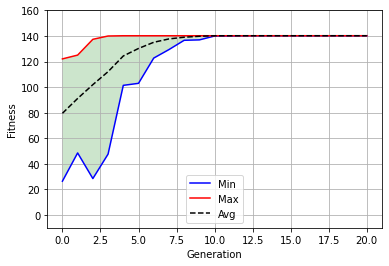

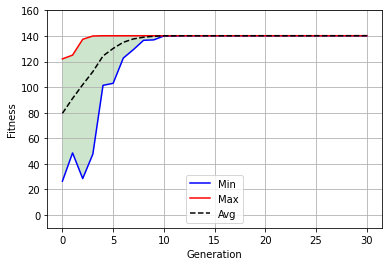

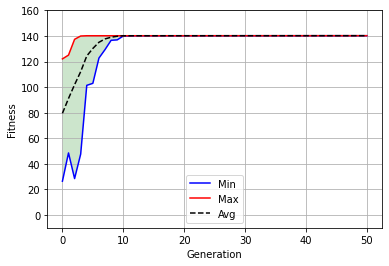

In [ ]:
for n in [20,30,50]:
    best, log = main(n)
    print("Mejor fitness: %f" %best[0].fitness.values)
    print("Mejor individuo %s" %best[0])
    plot_evolucion(log)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>